## Machine Learning -  Laboratorio 1 
### Integrantes
    - Marcelo Alejandro Farías Torres
    - César Antonio Godoy Delaigue 
    - Cristhian Alejandro Solís 
    - César Alfonso Soto Segura 

a) **Importación de librerías** 


In [62]:
# Importar librerías necesarias
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, accuracy_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Se importan librerias   
- Sklearn; donde se extrae el dataset a utilizar, algoritmos de machine learning, métricas y preprocesamiento. 
- Pandas y numpy para trabajos con DF
- Matplotlib para graficar
- Seaborn para visualizaciones especificas

b) **Exploración de datos**

In [63]:
# Cargar el conjunto de datos Wine
wine_data = load_wine()
df_wine = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df_wine['target'] = wine_data.target


In [64]:
# Visualizar las primeras filas del DataFrame
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [65]:
# Tamaño del DF
print(f"El tamaño del dataframe es {load_wine().data.shape}") 

El tamaño del dataframe es (178, 13)


In [66]:
# Información de variables
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [67]:
# Resumen estadistico
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


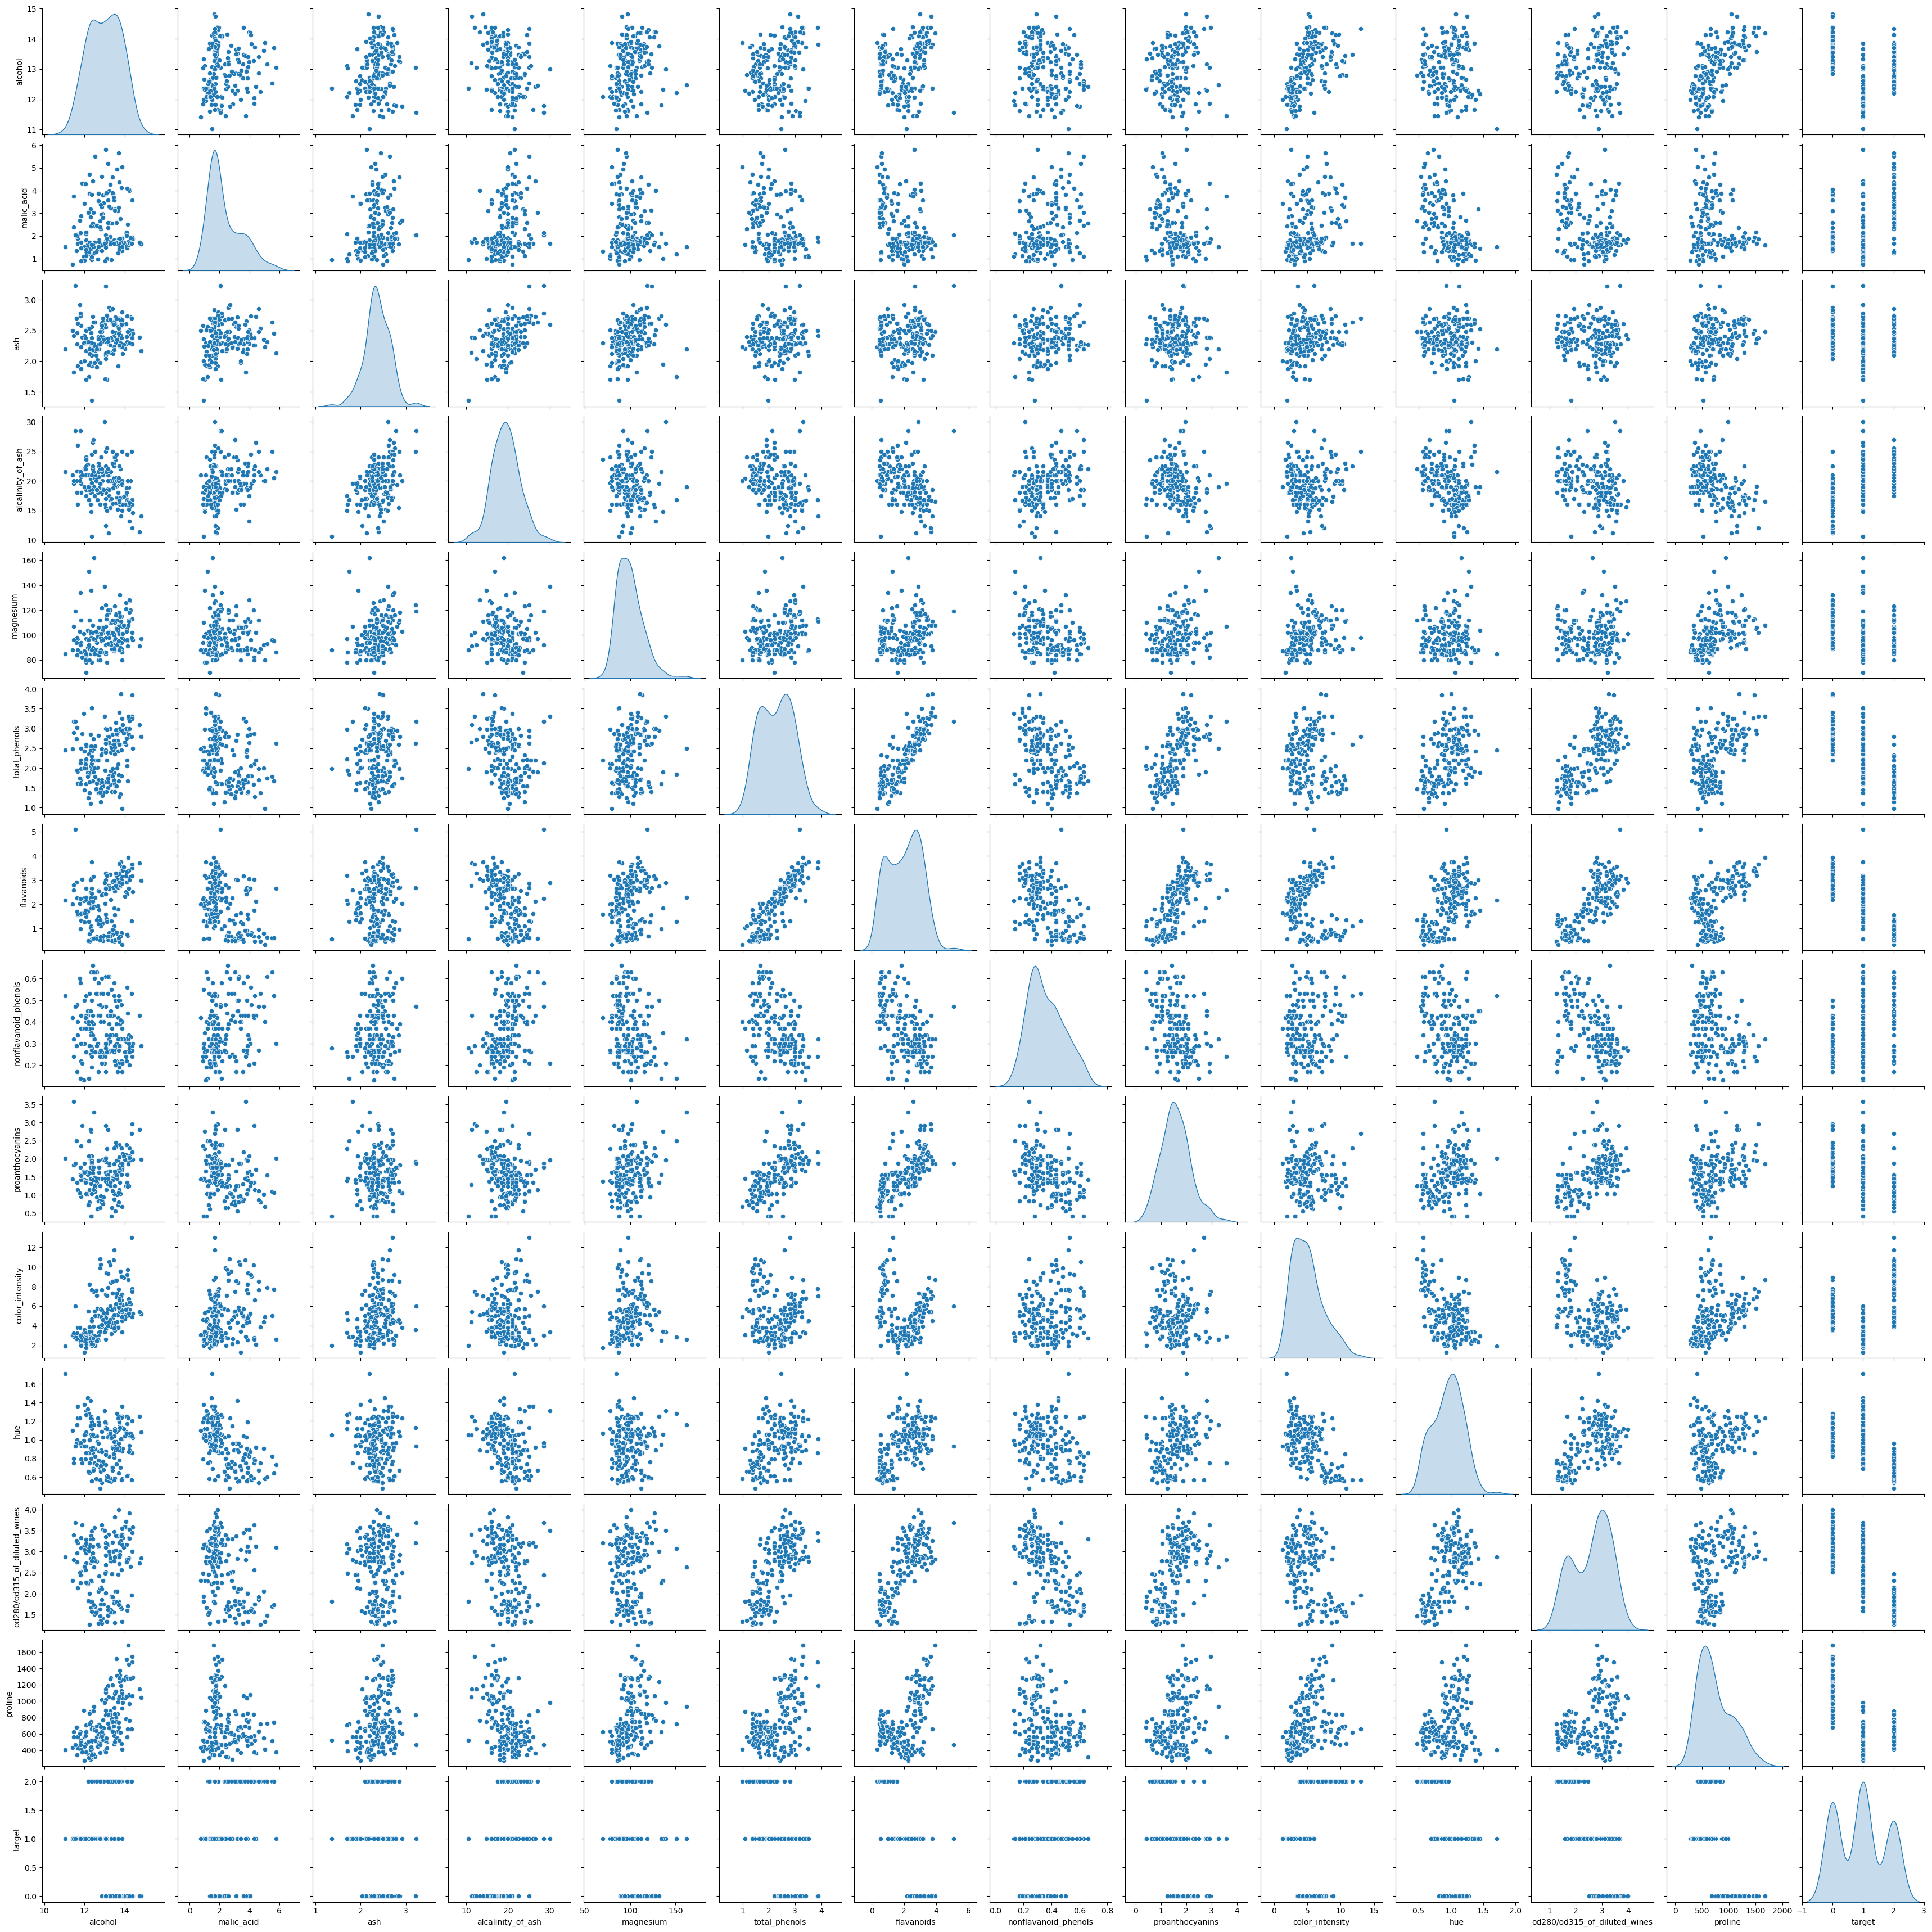

In [68]:
# Visualización Inicial del dataframe
sns.pairplot(df_wine, diag_kind='kde')  
plt.show()

#### Información relevante

1. **alcohol**: Contenido de alcohol en el vino. 
2. **malic_acid**: Contenido de ácido málico en el vino. 
3. **ash**: Contenido de ceniza en el vino. 
4. **alcalinity_of_ash**: Alcalinidad de la ceniza en el vino.
5. **magnesium**: Contenido de magnesio en el vino. 
6. **total_phenols**: Contenido total de fenoles en el vino. 
7. **flavanoids**: Contenido de flavonoides en el vino. 
8. **nonflavanoid_phenols**: Contenido de fenoles no flavonoides en el vino. 
9. **proanthocyanins**: Contenido de proantocianidinas en el vino. 
10. **color_intensity**: Intensidad del color del vino.
11. **hue**: Matiz del color del vino. 
12. **od280/od315_of_diluted_wines**: Relación OD280/OD315 del vino diluido. 
13. **proline**: Contenido de prolina en el vino.
14. **target**: Variable objetivo 

Se considera relevante la descripción de las variables dado que desde estas se pueden identificar los atributos del PCA

- Se identifico un dataframe de solo 178 filas, lo cual, podria ser un factor riesgoso para generar algoritmos de machine learning debido a que se considera un dataframe de tamaño pequeño.

- Presenta un amplio abanico de escalas de medida para las 14 variables presentes

## **PCA** & ***Naive Bayes***

In [69]:
# Paso 1: Normalizar
# Normalización de variables con media 0 y Varianza
X = StandardScaler(with_std=True, with_mean=True).fit_transform(df_wine)

# Comprobación de la normalización 0
Medias = X.mean(axis=0)
print(f"Medias después de la normalización:\n {Medias}")

Var = X.var(axis=0)
print(f"Varianza despues de la normalización:\n {Var}")


Medias después de la normalización:
 [-8.38280756e-16 -1.19754394e-16 -8.37033314e-16 -3.99181312e-17
 -3.99181312e-17  0.00000000e+00 -3.99181312e-16  3.59263181e-16
 -1.19754394e-16  2.49488320e-17  1.99590656e-16  3.19345050e-16
 -1.59672525e-16  1.59672525e-16]
Varianza despues de la normalización:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


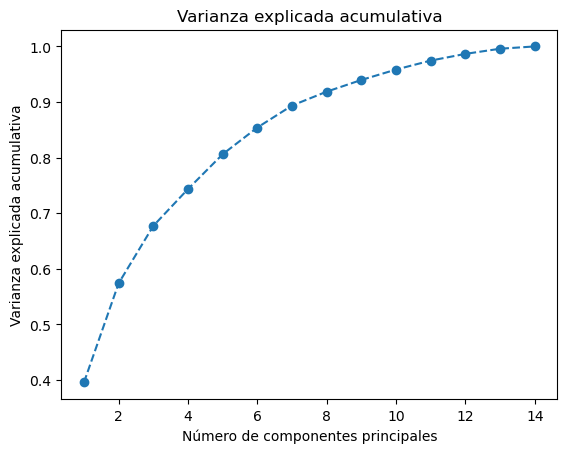

In [70]:
# Crear una instancia de PCA
pca = PCA()

# Aplicar PCA a tus datos estandarizados
principal_components = pca.fit_transform(X)

# Explorar la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Visualizar la varianza explicada acumulativa para decidir cuántos componentes conservar
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicada acumulativa')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.show()

In [88]:
n_components = 4 # Defino la cantidad de componente en función de la regla del "codo" 
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)

# Nuevo Data frame de  PCA
pc_df=pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

In [72]:
# ¿Cuanta varianza explica el PCA? 
varianza_explicada = (pca.explained_variance_ratio_[0:3].sum())*100
print(f"La varianza explicada es: {varianza_explicada}%")

La varianza explicada es: 67.70784649085955%


Text(0.5, 1.0, 'Matriz de Correlación de las Variables')

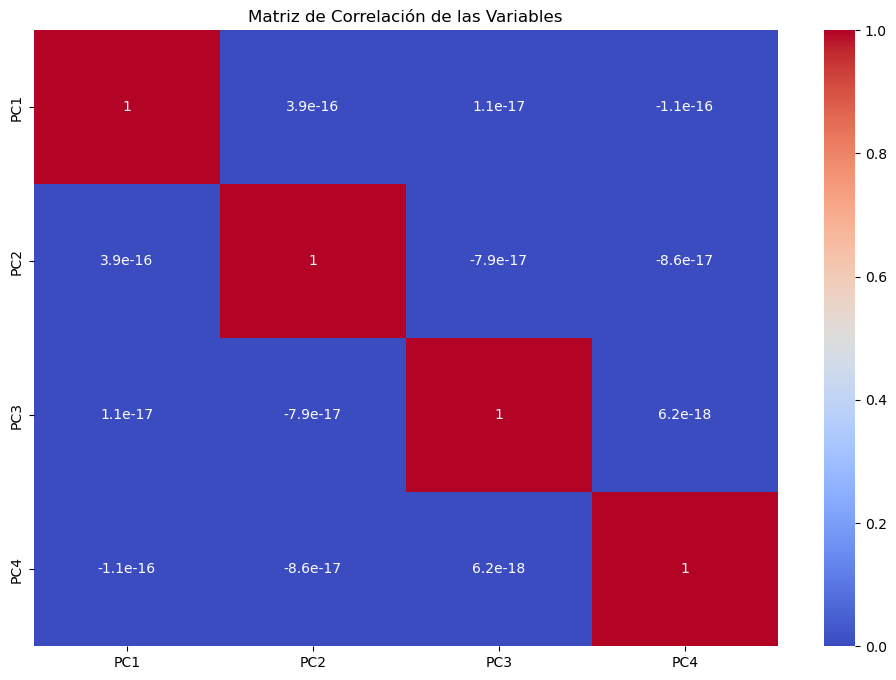

In [73]:
# Visualización de componentes principales en pares
plt.figure(figsize=(12, 8))
correlation_matrix = pc_df.corr()  # Calcula la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de las Variables')


Cargas de variables en cada componente principal:
                            PC1              PC2  \
0                        target  color_intensity   
1                    flavanoids          alcohol   
2                 total_phenols          proline   
3  od280/od315_of_diluted_wines              ash   
4               proanthocyanins        magnesium   

                            PC3                   PC4  
0                           ash            malic_acid  
1             alcalinity_of_ash       proanthocyanins  
2                       alcohol                   hue  
3          nonflavanoid_phenols  nonflavanoid_phenols  
4  od280/od315_of_diluted_wines               proline  


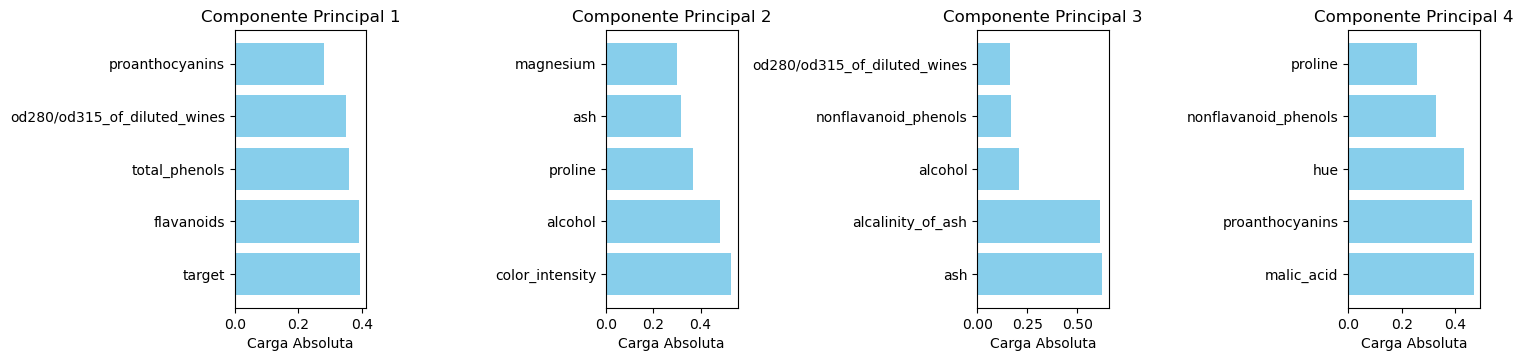

In [74]:
#Componentes
# Crear un DataFrame con las cargas de cada variable en cada componente principal
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, n_components + 1)], index=df_wine.columns)

#Importancia de las variables
loadings_abs = loadings.abs()

# Mostrar las 5 variables con las cargas más altas para cada componente principal
top_loadings = loadings_abs.apply(lambda x: x.nlargest(5).index)

# Mostrar las cargas
print("Cargas de variables en cada componente principal:")
print(top_loadings)
plt.figure(figsize=(15, 10))

for i in range(n_components):
    plt.subplot(3, 4, i + 1) #grafico de 3 filas y 3 columnas para visualizar cada componente
    top_vars = top_loadings[f'PC{i+1}'] #muestra los variables con mayor importancia para cada componente
    loading_values = loadings_abs[f'PC{i+1}'][top_vars]
    plt.barh(top_vars, loading_values, color='skyblue')
    plt.xlabel('Carga Absoluta')
    plt.title(f'Componente Principal {i+1}')

plt.tight_layout()
plt.show()

In [75]:
model = GaussianNB()

In [76]:
# Acceder a la columna 'target' correctamente
df_wine_type = df_wine['target']

# Mostrar las primeras filas del DataFrame
print(df_wine_type.head())

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32


In [77]:
_train, X_test, y_train, y_test = train_test_split(pc_df, df_wine_type, train_size = 0.7, random_state=1234)

C) **Selección de muestra**

Durante los bloques de codigo se entreno el modelo con una partición de 0.7 - 0.3 para entrenamiento - test ; utilizando 4 componententes principales

In [78]:
model.fit(X_train,y_train)

GaussianNB()

In [79]:
labels = model.predict(X_test)

In [80]:
# Entrenar el modelo Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Realizar predicciones
y_pred = nb.predict(X_test)


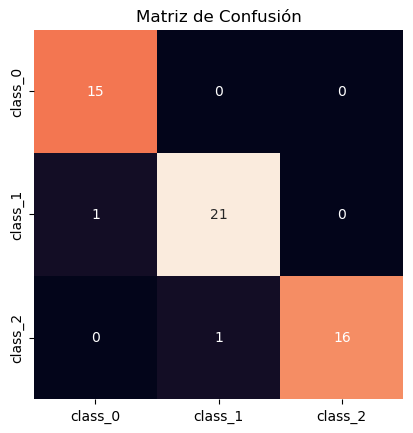

In [83]:
# Generar la matriz de confusión
mat = confusion_matrix(y_test, y_pred)

# Cargar los nombres de las clases desde el conjunto de datos original
wine_data = load_wine()

# Graficar la matriz de confusión
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)

plt.xlabel('')
plt.ylabel('')
plt.title('Matriz de Confusión')
plt.show()


In [82]:
print(f'precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'recall: {recall_score(y_test, y_pred, average="macro")}')
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'f1 score: {f1_score(y_test, y_pred, average="macro")}')


precision: 0.9652406417112299
recall: 0.9640151515151515
accuracy: 0.9629629629629629
f1 score: 0.9639947865754318


D) **Resultados**   
El modelo muestra una F-1 score 0.96 por lo cual se podria afirmar que posee buenas metricas tanto para precision, como, recall. por ende se encuentra balanceado. 

E) **Concluya**

Si bien las metricas para medir el modelos son aceptables, no se consdira como un buen modelo, ya que al ser tener bajo N poblacional, se estima que el modelo, más que, aprender a predecir "memoriza" la información. 